# I. Using the Friends dataset build words embeddings using GENSIM and word2vec

In [61]:
import gzip
import gensim
import logging
import pandas as pd
from gensim.utils import simple_preprocess
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential

In [14]:
# TODO: Comentar ruta_dataset de abajo que es la ruta de colab, y la local para jupyter es la de arriba
ruta_dataset = 'docs/dialogs_friends_filter.csv'
# ruta_dataset = 'drive/MyDrive/dialogs_friends_filter.csv'

df = pd.read_csv(ruta_dataset).dropna()

# imprima las primeras 5 filas
df.head()

print(df.shape)
df.head(20) # returns (rows, columns)

(46514, 2)


,raw_character_text,spoken_words
0,Monica,There's nothing to tell! He's just some guy I ...
1,Joey,"C'mon, you're going out with the guy! There's ..."
2,Chandler,"All right Joey, be nice. So does he have a hu..."
3,Phoebe,"Wait, does he eat chalk?"
4,Phoebe,"Just, 'cause, I don't want her to go through w..."
5,Monica,"Okay, everybody relax. This is not even a date..."
6,Chandler,Sounds like a date to me.
7,Chandler,"Alright, so I'm back in high school, I'm stand..."
8,Chandler,"Then I look down, and I realize there's a phon..."
9,Joey,Instead of...?


In [15]:
def preproccess(line):
    return simple_preprocess(line)

df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Monica,There's nothing to tell! He's just some guy I ...,"[there, nothing, to, tell, he, just, some, guy..."
1,Joey,"C'mon, you're going out with the guy! There's ...","[mon, you, re, going, out, with, the, guy, the..."
2,Chandler,"All right Joey, be nice. So does he have a hu...","[all, right, joey, be, nice, so, does, he, hav..."
3,Phoebe,"Wait, does he eat chalk?","[wait, does, he, eat, chalk]"
4,Phoebe,"Just, 'cause, I don't want her to go through w...","[just, cause, don, want, her, to, go, through,..."
5,Monica,"Okay, everybody relax. This is not even a date...","[okay, everybody, relax, this, is, not, even, ..."
6,Chandler,Sounds like a date to me.,"[sounds, like, date, to, me]"
7,Chandler,"Alright, so I'm back in high school, I'm stand...","[alright, so, back, in, high, school, standing..."
8,Chandler,"Then I look down, and I realize there's a phon...","[then, look, down, and, realize, there, phone,..."
9,Joey,Instead of...?,"[instead, of]"


In [16]:
documents = df['proccesed'].to_numpy()

### Generate 150 sized Word2vec embbedings

In [17]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_150 = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)
# model_150 = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10, sg=1)

model_150.train(documents, total_examples=len(documents), epochs=10)

(3685629, 5213860)

In [18]:
model_150.save("Friends_150_5.model")

In [19]:
print(model_150.wv['everybody'])

[-0.07560975  0.12147306  0.04528654  0.02577557 -0.41615477 -0.10829998
 -0.1841865   0.4843759   0.54045784  0.20415445 -0.29947382  0.6447435
 -0.27400178  0.274366   -0.1458756   0.3167415  -0.29831713 -0.42664635
 -0.19284566 -0.00505481 -0.14758414  0.31462896 -0.10079949  0.07727164
  0.25607666 -0.0863259   0.0679035  -0.33072963 -0.26807472 -0.02952423
 -0.388757   -0.10733836 -0.50364774 -0.11157288 -0.01629725 -0.50511897
 -0.62855035  0.04967217  0.14266819 -0.04706245 -0.14756328 -0.2053929
  0.32907057  0.05850534  0.02248151 -0.08096796 -0.1876503  -0.04815659
 -0.08150055  0.31356448 -0.18257722 -0.04183808  0.12408423  0.13830298
  0.11711352 -0.5680398   0.46689478 -0.6304176   0.3651878  -0.08744648
  0.2537547   0.13305426  0.15472761  0.15701026 -0.1394557   0.14024164
 -0.32671282 -0.5123784  -0.84708506 -0.6257889  -0.05424089 -0.07767647
 -0.8314027   0.27456582  0.05162996  0.02622456 -0.11320598 -0.21453637
  0.487357    0.10440467 -0.147015   -0.03115009 -0.2

### Generate 100 sized Word2vec embbedings

In [20]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_100 = gensim.models.Word2Vec (documents, vector_size=100, window=10, min_count=2, workers=10, sg=1)
# model_100 = gensim.models.Word2Vec (documents, size=100, window=10, min_count=2, workers=10, sg=1)

model_100.train(documents,total_examples=len(documents),epochs=10)

(3685650, 5213860)

In [21]:
model_100.save("Friends_100_5.model")

In [22]:
print(model_100.wv['everybody'])

[-0.10860322  0.07901331  0.23625615 -0.12618029 -0.8978105  -0.7328843
 -0.25744963  0.26594552  0.89588976  0.40621948 -0.26659623  0.20628645
  0.32897004 -0.17215131 -0.47909477  0.25531554 -0.22895959 -0.33176327
 -0.30941704  0.3293525   0.26937646  0.22238494 -0.36717606 -0.14252885
  0.45741293 -0.03946603 -0.3226859  -0.9503796  -0.05675234  0.13156196
  0.03569867  0.41238064  0.2621025  -0.01679     0.34107888 -0.22627789
 -0.82335335  0.31070098  0.35341668  0.08576475  0.12158707 -0.39452848
  0.35031837 -0.08514018 -0.07579467  0.38366568 -0.27193743  0.14963077
  0.01485519  0.3617967   0.29921982  0.5060089  -0.43497926  0.08635636
 -0.25792113  0.2997669   0.12906188 -0.00582396  0.05084908  0.15829572
  0.12199694  0.6457511   0.6392592   0.03990049 -0.21378937  0.19137782
 -0.36666903  0.40251553 -0.26363823 -0.4913858   0.38398662 -0.20648198
 -0.75312436 -0.3452203   0.41900074  0.03794694 -0.5482297  -0.14119475
  0.3435098  -0.01493346 -0.31404975  0.24131742 -0.

### Generate 50 sized Word2vec embbedings

In [23]:
#TODO: Descomentar esta y comentar la otra, por alguna razon no es vector_size si no size en colab
model_50 = gensim.models.Word2Vec(documents, vector_size=50, window=10, min_count=2, workers=10, sg=1)
# model_50 = gensim.models.Word2Vec(documents, size=50, window=10, min_count=2, workers=10, sg=1)

model_50.train(documents, total_examples=len(documents),epochs=10)

(3684704, 5213860)

In [24]:
model_50.save("Friends_50_5.model")

In [25]:
df.shape

(46514, 3)

## Load from disk the generated models

In [28]:
model50 = gensim.models.Word2Vec.load("Friends_50_5.model")
model100 = gensim.models.Word2Vec.load("Friends_100_5.model")
model150 = gensim.models.Word2Vec.load("Friends_150_5.model")

In [36]:
model50.wv.similar_by_word('chandler')

[('ross', 0.8663024306297302),
 ('joey', 0.8629247546195984),
 ('monica', 0.8010052442550659),
 ('wonders', 0.7510892152786255),
 ('voices', 0.7479643821716309),
 ('pleased', 0.7438610792160034),
 ('rachel', 0.7412633895874023),
 ('trail', 0.7348557114601135),
 ('clunkers', 0.7320413589477539),
 ('approval', 0.7276598215103149)]

In [33]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig(f'./{word}_{n}.jpg')
    plt.show()

# I. 2D Graphs and analysis
***

**Vector dimension:** 50

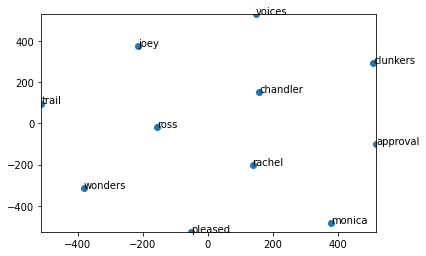

In [37]:
display_closestwords_tsnescatterplot(model50, 'chandler', 50)

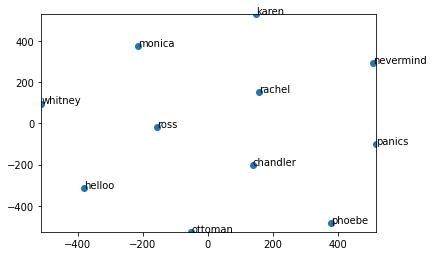

In [41]:
display_closestwords_tsnescatterplot(model50, 'rachel', 50)

**Vector dimension:** 100

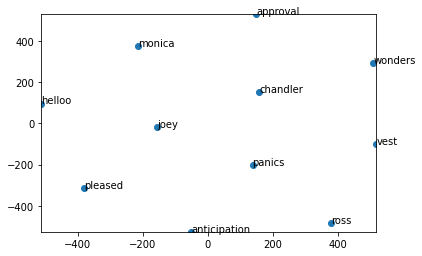

In [42]:
display_closestwords_tsnescatterplot(model100, 'chandler', 100)

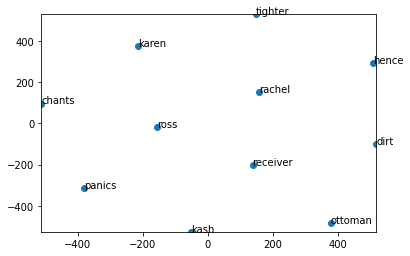

In [43]:
display_closestwords_tsnescatterplot(model100, 'rachel', 100)

**Vector size:** 150

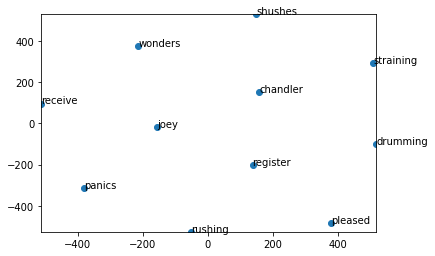

In [44]:
display_closestwords_tsnescatterplot(model150, 'chandler', 150)

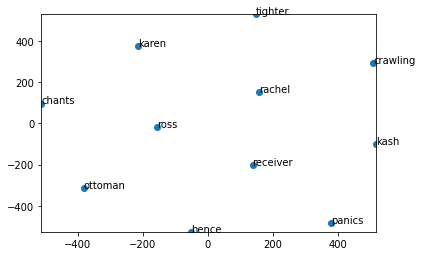

In [45]:
display_closestwords_tsnescatterplot(model150, 'rachel', 150)

# III. Redes neuronales

## Preparacion de los datos

In [78]:
'''
Aquí se filtra el dataset para que solo queden los dialogos relevantes, los de ls personajes principales.
'''
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv(ruta_dataset).dropna() 

# Esto sirve para saber cuantas categorías hay, abajo se usa. Por favor no borrar.
target_friends = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']

In [53]:
'''
Se realiza un Encoding de los nombres de los personajes principales. 
La idea es que cada categoría de personaje este codificada por un vector
1x6 binario. 
'''
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['raw_character_text']])
print(enc.categories_)

[array(['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross'],
      dtype=object)]


In [54]:
'''
Se dividen los datos en 60 training, 20 validación y 20 testing
'''
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values

y = enc.transform(df[['raw_character_text']]).toarray()
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)

# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test, y_test))

# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))

In [55]:
vectorize_layer = TextVectorization(
    ngrams=None, max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True, 
)

In [56]:
vectorize_layer.adapt(text_dataset.batch(32))
len(vectorize_layer.get_vocabulary())

14020

## Prueba 1

In [57]:
##LAYERS

# Start by creating an explicit input layer. It needs to have a shape of  
# (1,) (because we need to guarantee that there is exactly one doc
text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text') 

# The first layer in our model is the vectorization layer. After this layer,
# we have a tensor of shape (batch_size, max_len) containing vocab indices.

x = vectorize_layer(text_input) 
primera_capa = layers.Dense(10, activation='relu')(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense( len(target_friends), activation='softmax', name='predictions')(primera_capa) 
model = tf.keras.Model(text_input, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/
# Ojo con las metricas ya que el entrenamiento es en batches
# https://keras.io/api/models/model_training_apis/
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [58]:
# list(enc.get_feature_names())
len(vectorize_layer.get_vocabulary())

14020

In [59]:
batch_size = 32
epochs = 20

# Fit the model using the train and test datasets.
model.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size), 
    epochs=epochs)

Epoch 1/20
873/873 [==============================] - 5s 5ms/step - loss: 0.5414 - accuracy: 0.1861 - val_loss: 0.4452 - val_accuracy: 0.2380
Epoch 2/20
873/873 [==============================] - 4s 5ms/step - loss: 0.4376 - accuracy: 0.2700 - val_loss: 0.4350 - val_accuracy: 0.2795
Epoch 3/20
873/873 [==============================] - 5s 5ms/step - loss: 0.4145 - accuracy: 0.3578 - val_loss: 0.4306 - val_accuracy: 0.2942
Epoch 4/20
873/873 [==============================] - 5s 5ms/step - loss: 0.3884 - accuracy: 0.4361 - val_loss: 0.4320 - val_accuracy: 0.2941
Epoch 5/20
873/873 [==============================] - 4s 5ms/step - loss: 0.3646 - accuracy: 0.4823 - val_loss: 0.4373 - val_accuracy: 0.2967
Epoch 6/20
873/873 [==============================] - 4s 5ms/step - loss: 0.3443 - accuracy: 0.5205 - val_loss: 0.4452 - val_accuracy: 0.2946
Epoch 7/20
873/873 [==============================] - 4s 5ms/step - loss: 0.3273 - accuracy: 0.5487 - val_loss: 0.4548 - val_accuracy: 0.2939
Epoch 

In [60]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text (InputLayer)            [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 14020)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                140210    
_________________________________________________________________
predictions (Dense)          (None, 6)                 66        
Total params: 140,276
Trainable params: 140,276
Non-trainable params: 0
_________________________________________________________________


# 3. Multinomial classification using Embbedings

In [79]:
# Load pretrained models
model_50 = gensim.models.Word2Vec.load("Friends_50_5.model")
model_100 = gensim.models.Word2Vec.load("Friends_100_5.model")
model_150 = gensim.models.Word2Vec.load("Friends_150_5.model")

In [80]:
# pretrained.wv.index_to_key

def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) 
    embedding_dim = len(embedding['chandler'])
    hits = 0
    misses = 0
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for i in range(len(vocab)):
        try:
            weight_matrix[i] = embedding[vocab[i]]
            hits += 1
        except:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))
    return weight_matrix

In [81]:

x_train = vectorize_layer(np.array([[s] for s in sentences_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in sentences_val])).numpy()

y_train = np.array(y_train)
y_val = np.array(y_val)

In [82]:
print(x_train.shape)
print(x_val.shape)
# print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
# print(y_test.shape)

(27908, 14020)
(9303, 14020)
(27908, 6)
(9303, 6)


In [83]:
def generatePreEmbbedingModel(model, embedding_dim, vectorize_layer, architecture_id = 1):
    batch_size = 32
    epochs = 10
    weights = get_weight_matrix(model.wv, vectorize_layer.get_vocabulary())
    num_tokens = len(vectorize_layer.get_vocabulary()) 
    embedding_layer = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(weights),
        trainable=False,
    )

    int_sequences_input = tf.keras.Input(shape=(None,), dtype='int64')
    embedded_sequences = embedding_layer(int_sequences_input)
    x = layers.GlobalAveragePooling1D()(embedded_sequences)

    if architecture_id == 1:
        x = layers.Dense(10, activation='relu')(x)
    elif architecture_id == 2:
        x = layers.SimpleRNN(5)(x)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(10, activation='relu')(x)
    elif architecture_id == 3:
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(250, activation='relu')(x)
        x = layers.Dropout(0.5)(x)

    preds = layers.Dense(len(target_friends), activation='softmax')(x)
    modelRN = tf.keras.Model(int_sequences_input, preds)

    return modelRN

In [84]:
#Parameters
batch_size = 32
epochs = 10

## Primera Arquitectura

In [85]:
red_50_1 = generatePreEmbbedingModel(model_50, 50, vectorize_layer)
red_100_1 = generatePreEmbbedingModel(model_100, 100, vectorize_layer)
red_150_1 = generatePreEmbbedingModel(model_150, 150, vectorize_layer)

Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)


In [86]:
red_50_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 50)          701000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
Total params: 701,576
Trainable params: 576
Non-trainable params: 701,000
_________________________________________________________________


In [87]:
red_100_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 100)         1402000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
Total params: 1,403,076
Trainable params: 1,076
Non-trainable params: 1,402,000
_________________________________________________________________


In [88]:
red_150_1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 150)         2103000   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 150)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 66        
Total params: 2,104,576
Trainable params: 1,576
Non-trainable params: 2,103,000
_________________________________________________________________


In [89]:
red_50_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [90]:
red_50_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 62s 70ms/step - loss: 1.7903 - accuracy: 0.1761 - val_loss: 1.7897 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 63s 72ms/step - loss: 1.7885 - accuracy: 0.1847 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 59s 67ms/step - loss: 1.7890 - accuracy: 0.1850 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 59s 68ms/step - loss: 1.7891 - accuracy: 0.1829 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 62s 71ms/step - loss: 1.7894 - accuracy: 0.1774 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 64s 73ms/step - loss: 1.7887 - accuracy: 0.1821 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 61s 70ms/step - loss: 1.7895 - accuracy: 0.1764 - val_loss: 1.7898 - val_accuracy:

In [91]:
red_100_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 96s 109ms/step - loss: 1.7905 - accuracy: 0.1730 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 94s 108ms/step - loss: 1.7898 - accuracy: 0.1759 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 92s 106ms/step - loss: 1.7887 - accuracy: 0.1851 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 97s 111ms/step - loss: 1.7895 - accuracy: 0.1797 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 94s 108ms/step - loss: 1.7891 - accuracy: 0.1817 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 97s 111ms/step - loss: 1.7900 - accuracy: 0.1777 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 99s 113ms/step - loss: 1.7891 - accuracy: 0.1806 - val_loss: 1.7899 - val_ac

In [92]:
red_150_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 157s 179ms/step - loss: 1.7905 - accuracy: 0.1796 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 2/10
873/873 [==============================] - 159s 182ms/step - loss: 1.7895 - accuracy: 0.1761 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 156s 178ms/step - loss: 1.7896 - accuracy: 0.1809 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 153s 176ms/step - loss: 1.7886 - accuracy: 0.1807 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 153s 176ms/step - loss: 1.7894 - accuracy: 0.1799 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 153s 175ms/step - loss: 1.7889 - accuracy: 0.1826 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 153s 175ms/step - loss: 1.7890 - accuracy: 0.1783 - val_loss: 1.7899 -

In [93]:
red_50_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_1.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [94]:
red_50_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 66s 75ms/step - loss: 1.7893 - accuracy: 0.1809 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 67s 77ms/step - loss: 1.7894 - accuracy: 0.1842 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 64s 73ms/step - loss: 1.7895 - accuracy: 0.1830 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 4/10
873/873 [==============================] - 60s 68ms/step - loss: 1.7891 - accuracy: 0.1802 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 58s 66ms/step - loss: 1.7891 - accuracy: 0.1777 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 53s 61ms/step - loss: 1.7896 - accuracy: 0.1811 - val_loss: 1.7900 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 57s 65ms/step - loss: 1.7893 - accuracy: 0.1821 - val_loss: 1.7899 - val_accuracy:

In [95]:
red_100_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 91s 103ms/step - loss: 1.7897 - accuracy: 0.1769 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 2/10
873/873 [==============================] - 93s 107ms/step - loss: 1.7892 - accuracy: 0.1757 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 104s 119ms/step - loss: 1.7890 - accuracy: 0.1825 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 4/10
873/873 [==============================] - 110s 126ms/step - loss: 1.7883 - accuracy: 0.1846 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 108s 124ms/step - loss: 1.7891 - accuracy: 0.1804 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 101s 116ms/step - loss: 1.7889 - accuracy: 0.1820 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 115s 131ms/step - loss: 1.7890 - accuracy: 0.1774 - val_loss: 1.7898 - v

In [96]:
red_150_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 168s 192ms/step - loss: 1.7889 - accuracy: 0.1816 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 2/10
873/873 [==============================] - 169s 194ms/step - loss: 1.7886 - accuracy: 0.1834 - val_loss: 1.7900 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 158s 181ms/step - loss: 1.7891 - accuracy: 0.1775 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 155s 178ms/step - loss: 1.7896 - accuracy: 0.1813 - val_loss: 1.7900 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 154s 176ms/step - loss: 1.7889 - accuracy: 0.1786 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 158s 181ms/step - loss: 1.7898 - accuracy: 0.1796 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 7/10
873/873 [==============================] - 152s 175ms/step - loss: 1.7889 - accuracy: 0.1793 - val_loss: 1.7899 -

## Segunda Arquitectura

In [97]:
red_50_2 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 2)
red_100_2 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 2)
red_150_2 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 2)

Converted 7452 words (6568 misses)


ValueError: ignored

## Tercer Arquitectura

In [98]:
red_50_3 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 3)
red_100_3 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 3)
red_150_3 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 3)

Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)
Converted 7452 words (6568 misses)


In [99]:
red_50_3.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 50)          701000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 80)                4080      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 80)                320       
_________________________________________________________________
dense_9 (Dense)              (None, 250)               2025

In [100]:
red_100_3.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, None, 100)         1402000   
_________________________________________________________________
global_average_pooling1d_6 ( (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 80)                8080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
dense_12 (Dense)             (None, 250)               2025

In [101]:
red_150_3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 150)         2103000   
_________________________________________________________________
global_average_pooling1d_7 ( (None, 150)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 80)                12080     
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 80)                320       
_________________________________________________________________
dense_15 (Dense)             (None, 250)               2025

In [102]:
red_50_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [103]:
red_50_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 68s 77ms/step - loss: 1.7906 - accuracy: 0.1753 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 60s 69ms/step - loss: 1.7896 - accuracy: 0.1795 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 58s 67ms/step - loss: 1.7897 - accuracy: 0.1816 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 59s 67ms/step - loss: 1.7887 - accuracy: 0.1846 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 5/10
873/873 [==============================] - 59s 68ms/step - loss: 1.7892 - accuracy: 0.1809 - val_loss: 1.7900 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 59s 68ms/step - loss: 1.7891 - accuracy: 0.1799 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 58s 66ms/step - loss: 1.7884 - accuracy: 0.1827 - val_loss: 1.7898 - val_accuracy:

In [104]:
red_100_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 95s 108ms/step - loss: 1.7901 - accuracy: 0.1790 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 2/10
873/873 [==============================] - 94s 107ms/step - loss: 1.7898 - accuracy: 0.1810 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 89s 102ms/step - loss: 1.7887 - accuracy: 0.1850 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 89s 102ms/step - loss: 1.7893 - accuracy: 0.1788 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 5/10
873/873 [==============================] - 93s 106ms/step - loss: 1.7891 - accuracy: 0.1848 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 6/10
873/873 [==============================] - 104s 120ms/step - loss: 1.7892 - accuracy: 0.1789 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 7/10
873/873 [==============================] - 104s 119ms/step - loss: 1.7891 - accuracy: 0.1834 - val_loss: 1.7899 - val_

In [105]:
red_150_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
873/873 [==============================] - 166s 190ms/step - loss: 1.7904 - accuracy: 0.1813 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 2/10
873/873 [==============================] - 171s 195ms/step - loss: 1.7891 - accuracy: 0.1839 - val_loss: 1.7898 - val_accuracy: 0.1845
Epoch 3/10
873/873 [==============================] - 173s 198ms/step - loss: 1.7890 - accuracy: 0.1798 - val_loss: 1.7899 - val_accuracy: 0.1845
Epoch 4/10
873/873 [==============================] - 168s 193ms/step - loss: 1.7890 - accuracy: 0.1840 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 5/10
873/873 [==============================] - 161s 185ms/step - loss: 1.7891 - accuracy: 0.1786 - val_loss: 1.7899 - val_accuracy: 0.1740
Epoch 6/10
873/873 [==============================] - 158s 181ms/step - loss: 1.7898 - accuracy: 0.1774 - val_loss: 1.7900 - val_accuracy: 0.1740
Epoch 7/10
873/873 [==============================] - 152s 174ms/step - loss: 1.7899 - accuracy: 0.1777 - val_loss: 1.7899 -

## 4.1 Red Feedforward

### Using trained in place embeddings

In [106]:
#Parameters

batch_size = 32
epochs = 10

In [107]:
vocab_size = wm.shape[0]
embedding_dim = 50
max_dialog_length = 200

NameError: ignored

In [ ]:
embedding_dim = 5

modelemb_inplace = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, weights=[wm], input_length=max_dialog_length, name="embedding", trainable=False),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [ ]:
modelemb_inplace.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
modelemb_inplace.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

In [ ]:
modelemb_inplace.summary()

### Output mode: binary

In [ ]:
vectorize_layer_bin = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer_bin.adapt(text_dataset.batch(batch_size))

In [ ]:
vocab_size = len(vectorize_layer_bin.get_vocabulary())
vocab_size

In [ ]:
embedding_dim = 5

modelemb_bin = Sequential([
  vectorize_layer_bin ,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [ ]:
modelemb_bin.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
modelemb_bin.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

In [ ]:
modelemb_bin.summary()

### Output mode: int

In [ ]:
vectorize_layer_int = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='int', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer_int.adapt(text_dataset.batch(batch_size))

In [ ]:
vocab_size = len(vectorize_layer_int.get_vocabulary())
vocab_size

In [ ]:
embedding_dim = 5

modelemb_int = Sequential([
  vectorize_layer_int,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [ ]:
modelemb_int.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
modelemb_int.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

In [ ]:
modelemb_int.summary()

### Output mode: tf-idf

In [ ]:
vectorize_layer_tf-idf = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='tf-idf', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer_tf-idf.adapt(text_dataset.batch(batch_size))

In [ ]:
vocab_size = len(vectorize_layer_tf-idf.get_vocabulary())
vocab_size

In [ ]:
embedding_dim = 5

modelemb_tf-idf = Sequential([
  vectorize_layer_tf-idf,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [ ]:
modelemb_tf-idf.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [ ]:
modelemb_tf-idf.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs,)

In [ ]:
modelemb_tf-idf.summary()